#### Install system packages for ODBC

In [1]:
!apt-get update
!apt-get install gcc
!apt-get install -y tdsodbc unixodbc-dev
!apt install unixodbc-bin -y
!apt-get clean 

Get:1 http://archive.ubuntu.com/ubuntu bionic InRelease [242 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:5 http://archive.ubuntu.com/ubuntu bionic/main amd64 Packages [1344 kB]    
Get:6 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 Packages [186 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic/universe amd64 Packages [11.3 MB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1420 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [29.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2256 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [500 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic/restricted amd64 Packages [13.5 kB]
Get:13 htt

Get:7 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxext6 amd64 2:1.3.3-1 [29.4 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic/main amd64 fontconfig amd64 2.12.6-0ubuntu2 [169 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmng2 amd64 2.0.2-0ubuntu3 [169 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 x11-common all 1:7.7+19ubuntu7.1 [22.5 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic/main amd64 libice6 amd64 2:1.0.9-2 [40.2 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsm6 amd64 2:1.2.2-1 [15.8 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxt6 amd64 1:1.1.5-1 [160 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic/main amd64 libaudio2 amd64 1.9.4-6 [50.3 kB]
Get:15 http://archive.ubuntu.com/ubuntu bionic/main amd64 mysql-common all 5.8+1.0.4 [7308 B]
Get:16 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmysqlclient20 amd64 5.7.34-0ubuntu0.18.04.1 [689 kB]
Get:17 http://archiv

7Progress: [ 22%] [############..............................................] 8Selecting previously unselected package mysql-common.
Preparing to unpack .../14-mysql-common_5.8+1.0.4_all.deb ...
7Progress: [ 23%] [#############.............................................] 8Unpacking mysql-common (5.8+1.0.4) ...
7Progress: [ 24%] [##############............................................] 8Selecting previously unselected package libmysqlclient20:amd64.
Preparing to unpack .../15-libmysqlclient20_5.7.34-0ubuntu0.18.04.1_amd64.deb ...
Unpacking libmysqlclient20:amd64 (5.7.34-0ubuntu0.18.04.1) ...
7Progress: [ 25%] [##############............................................] 8Selecting previously unselected package qtcore4-l10n.
Preparing to unpack .../16-qtcore4-l10n_4%3a4.8.7+dfsg-7ubuntu1_all.deb ...
7Progress: [ 26%] [###############...........................................] 8Unpacking qtcore4-l10n (4:4.8.7+dfsg-7ubuntu1) ...
7Progress: [ 27%] [###############..........

7Progress: [ 59%] [##################################........................] 8Setting up libjbig0:amd64 (2.1-3.1build1) ...
7Progress: [ 60%] [##################################........................] 8Setting up qtcore4-l10n (4:4.8.7+dfsg-7ubuntu1) ...
7Progress: [ 61%] [###################################.......................] 8Setting up mysql-common (5.8+1.0.4) ...
7Progress: [ 62%] [####################################......................] 8update-alternatives: using /etc/mysql/my.cnf.fallback to provide /etc/mysql/my.cnf (my.cnf) in auto mode
Setting up qtchooser (64-ga1b6736-5) ...
7Progress: [ 63%] [####################################......................] 8Setting up libtiff5:amd64 (4.0.9-5ubuntu0.4) ...
7Progress: [ 65%] [#####################################.....................] 87Progress: [ 65%] [#####################################.....................] 8Setting up libmng2:amd64 (2.0.2-0ubuntu3) ...
7Progress: [ 66%] [###########################

#### Use this command to troubleshoot a failed pyodbc installation:
!pip install --upgrade --global-option=build_ext --global-option="-I/usr/local/include"  --global-option="-L/usr/local/lib" pyodbc

In [39]:
!pip install pyodbc
!pip install pandas

In [4]:
!rm /etc/odbcinst.ini
!rm /etc/odbc.ini

In [5]:
!ln -s /tf/odbcinst.ini /etc/odbcinst.ini
!ln -s /tf/odbc.ini /etc/odbc.ini

In [6]:
!cat /tf/odbcinst.ini

[InterSystems ODBC35]
UsageCount=1
Driver=/tf/libirisodbcu35.so
Setup=/tf/libirisodbcu35.so
SQLLevel=1
FileUsage=0
DriverODBCVer=02.10
ConnectFunctions=YYN
APILevel=1
DEBUG=1
CPTimeout=<not pooled>



In [7]:
!cat /tf/odbc.ini

[user]
Driver=InterSystems ODBC35
Protocol=TCP
Host=irisimlsvr
Port=51773
Namespace=USER
UID=SUPERUSER
Password=SYS
Description=Sample namespace
Query Timeout=0
Static Cursors=0



In [8]:
!odbcinst -j

unixODBC 2.3.4
DRIVERS............: /etc/odbcinst.ini
SYSTEM DATA SOURCES: /etc/odbc.ini
FILE DATA SOURCES..: /etc/ODBCDataSources
USER DATA SOURCES..: /root/.odbc.ini
SQLULEN Size.......: 8
SQLLEN Size........: 8
SQLSETPOSIROW Size.: 8


#### Get an ODBC connection 

In [15]:
import pyodbc 
import time

dsn = 'IRIS QuickML demo via PyODBC'
server = 'irisimlsvr'
port = '1972'
database = 'USER' 
username = 'SUPERUSER' 
password = 'SYS' 
cnxn = pyodbc.connect('DRIVER={InterSystems ODBC35};SERVER='+server+';PORT='+port+';DATABASE='+database+';UID='+username+';PWD='+ password)

cnxn.setdecoding(pyodbc.SQL_CHAR, encoding='utf8')
cnxn.setdecoding(pyodbc.SQL_WCHAR, encoding='utf8')
cnxn.setencoding(encoding='utf8')
cursor = cnxn.cursor()

####  Prepare training data, and give a model name

In [96]:
dataTable = 'BitcoinRates'
dataTablePredict = 'BitcoinRatesResult'
dataColumn =  'Rate'
dataColumnPredict = "PredictedRate"
modelName = "SVR_model" # must be unique

#### Get bitcoin rate history rates

In [27]:
cursor.execute(f"CREATE TABLE {dataTable} ( id INT(32) AUTO_INCREMENT PRIMARY KEY, day DATE, rate FLOAT)")

In [72]:
import pandas as pd
from datetime import datetime, timedelta

rates = pd.read_csv("coin_Bitcoin.csv", sep=",")
rates['Date'] = pd.to_datetime(rates.Date)
rates['Rate'] = (rates['High']+rates['Low'])/2
del rates['SNo'], rates['Name'], rates['Symbol'], rates['High'], rates['Low'], rates['Open'], rates['Close'], rates['Volume'], rates['Marketcap']

last_year_rates = rates.loc[rates['Date'] >= datetime.today() - timedelta(days=365)]

last_year_rates.head()

,Date,Rate
2640,2020-07-21 23:59:59,9278.326487
2641,2020-07-22 23:59:59,9425.086202
2642,2020-07-23 23:59:59,9546.625572
2643,2020-07-24 23:59:59,9552.395478
2644,2020-07-25 23:59:59,9617.384605


#### Drow bitcoin rate chart

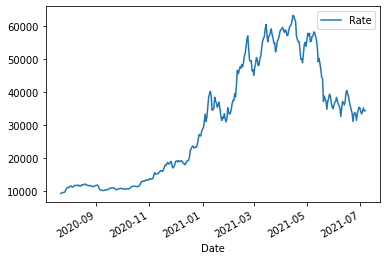

In [73]:
last_year_rates.plot.line('Date', 'Rate')

#### Insert data into IRIS

In [ ]:
for index, row in last_year_rates.iterrows():
    cursor.execute(f"INSERT INTO {dataTable} VALUES ({index},{str(row['Date'])[0:10]}, {row['Rate']})")

#### Train model and make prediction

In [97]:
cursor.execute("DROP TABLE %s" % (dataTablePredict))
cursor.execute("CREATE MODEL %s PREDICTING (%s)  FROM %s" % (modelName, dataColumn, dataTable))
cursor.execute("TRAIN MODEL %s FROM %s" % (modelName, dataTable))
cursor.execute("Create Table %s (%s VARCHAR(100), %s VARCHAR(100))" % (dataTablePredict, dataColumnPredict, dataColumn))
cursor.execute("INSERT INTO %s SELECT TOP 50 PREDICT(%s) AS %s, %s FROM %s" % (dataTablePredict, modelName, dataColumnPredict, dataColumn, dataTable)) 
cnxn.commit()

#### Look at result

In [110]:
from IPython.display import display

result = pd.read_sql("SELECT * from %s ORDER BY ID" % dataTablePredict, cnxn)
result.head()

,PredictedRate,Rate
0,9766.4853515625,9278.326487345001
1,9766.4853515625,9425.086201965001
2,9766.4853515625,9546.625571864999
3,9766.4853515625,9552.3954784
4,9766.4853515625,9617.384604610001


#### Check model accuracy

When training the model, the accuracy is considered satisfactory if the value is greater than 95%.

In [109]:
result['Deviation'] = abs(result['Rate'].astype(float) - result['PredictedRate'].astype(float))/result['Rate'].astype(float)
mape = result['Deviation'].sum()*100/result['Deviation'].count()
accuracy = 100-mape
accuracy


98.43334650997019

In [ ]:
cnxn.close()